### Load Necessary Libraries and the Dataset

In [26]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from scipy.stats import *
from scipy.stats import shapiro
import scipy.stats as stats
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import *
import matplotlib.colors as mcolors
from pandas.plotting import table
import mpld3
import plotly.io as pio
import plotly.tools as tls

ModuleNotFoundError: No module named 'mpld3'

In [30]:
# I loaded data from the csv file into a DataFrame and save in a variable named plant_growth.
plant_growth = pd.read_csv('plant_growth_data.csv')

In [5]:
plant_growth.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [6]:
plant_growth.size

1351

In [7]:
plant_growth.shape

(193, 7)

In [8]:
plant_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [9]:
# Filtering duplicated values
plant_growth.duplicated().sum()

np.int64(0)

In [10]:
plant_growth['Soil_Type'].value_counts()

Soil_Type
clay     67
sandy    64
loam     62
Name: count, dtype: int64

In [11]:
plant_growth['Fertilizer_Type'].value_counts()

Fertilizer_Type
none        74
chemical    65
organic     54
Name: count, dtype: int64

In [12]:
plant_growth['Water_Frequency'].value_counts()

Water_Frequency
daily        74
bi-weekly    60
weekly       59
Name: count, dtype: int64

In [13]:
plant_growth['Growth_Milestone'].value_counts()

Growth_Milestone
0    97
1    96
Name: count, dtype: int64

In [31]:
# I inserted two new columns for representing 'Water Frequency' and 'Fertilizer Type' categories in numeric values.
Water_Frequency_Num = []
for Water_Frequency in plant_growth['Water_Frequency'].tolist():
    if Water_Frequency == 'daily':
        Water_Frequency_Num.append(3)
    elif Water_Frequency == 'bi-weekly':
        Water_Frequency_Num.append(2)
    else:
        Water_Frequency_Num.append(1)
plant_growth['Water_Frequency_Num'] = Water_Frequency_Num

Fertilizer_Type_Num = []
for Fertilizer_Type in plant_growth['Fertilizer_Type'].tolist():
    if Fertilizer_Type == 'none':
        Fertilizer_Type_Num.append(1)
    elif Fertilizer_Type == 'organic':
        Fertilizer_Type_Num.append(2)
    else:
        Fertilizer_Type_Num.append(3)
plant_growth['Fertilizer_Type_Num'] = Fertilizer_Type_Num
plant_growth.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone,Water_Frequency_Num,Fertilizer_Type_Num
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0,2,3
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1,1,2
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0,2,1
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0,2,1
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0,2,2


In [16]:
plant_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


### Exploratory Data Analysis

In [15]:
descriptive_stats = plant_growth.describe().T

descriptive_stats.to_html('plant_growth_project.html')
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Sunlight_Hours,193.0,6.826484,1.599509,4.033133,5.477000,6.833290,8.241144,9.913903
Temperature,193.0,25.076087,5.354170,15.200000,20.637095,25.912336,29.757938,34.810103
Humidity,193.0,58.098927,12.631799,30.567682,49.300000,59.182806,69.100000,79.648240
Growth_Milestone,193.0,0.497409,0.501294,0.000000,0.000000,0.000000,1.000000,1.000000


In [17]:
#Identify outliers using the z-score method: Sunlgiht_Hours
upper_limit = plant_growth['Sunlight_Hours'].mean() + 3*plant_growth['Sunlight_Hours'].std()
lower_limit = plant_growth['Sunlight_Hours'].mean() + -3*plant_growth['Sunlight_Hours'].std()
plant_growth.loc[(plant_growth['Sunlight_Hours'] > upper_limit) | (plant_growth['Sunlight_Hours'] < lower_limit)]

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone


In [18]:
# Identify outliers using the z-score method: Temperature
upper_limit = plant_growth['Temperature'].mean() + 3*plant_growth['Temperature'].std()
lower_limit = plant_growth['Temperature'].mean() + -3*plant_growth['Temperature'].std()
plant_growth.loc[(plant_growth['Temperature'] > upper_limit) | (plant_growth['Temperature'] < lower_limit)]

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone


In [19]:
# Identfy outliers using the z-score method: Humidity
upper_limit = plant_growth['Humidity'].mean() + 3*plant_growth['Humidity'].std()
lower_limit = plant_growth['Humidity'].mean() + -3*plant_growth['Humidity'].std()
plant_growth.loc[(plant_growth['Humidity'] > upper_limit) | (plant_growth['Humidity'] < lower_limit)]

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone


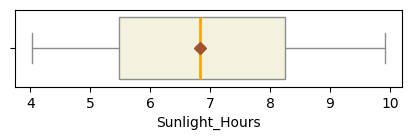

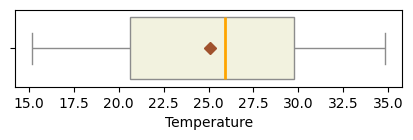

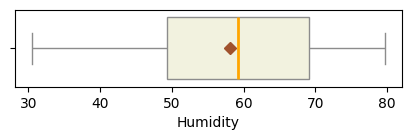

In [27]:
# Outliers were checked by plotting the columns containing numeric values on boxplots as well. 
meanprops = dict(markerfacecolor='sienna', marker='D', markeredgecolor='sienna', markersize=6)
flierprops = dict(markerfacecolor='green', marker='o')
medianprops = dict(color='orange', linewidth=2)

plt.figure(figsize=(5,1), dpi=100)
sns.boxplot(x=plant_growth['Sunlight_Hours'], color='beige', vert=False, flierprops=flierprops, showmeans=True, meanprops=meanprops, medianprops=medianprops)
plt.savefig('Sunlgiht.jpg', dpi=300, transparent=True, bbox_inches='tight')

plt.figure(figsize=(5,1), dpi=100)
sns.boxplot(x=plant_growth['Temperature'], color='beige', vert=False, flierprops=flierprops, showmeans=True, meanprops=meanprops, medianprops=medianprops)
plt.savefig('Temperature.jpg', dpi=300, transparent=True, bbox_inches='tight')

plt.figure(figsize=(5,1), dpi=100)
sns.boxplot(x=plant_growth['Humidity'], color='beige', vert=False, flierprops=flierprops, showmeans=True, meanprops=meanprops, medianprops=medianprops)
plt.savefig('Humidity.jpg', dpi=300, transparent=True, bbox_inches='tight')


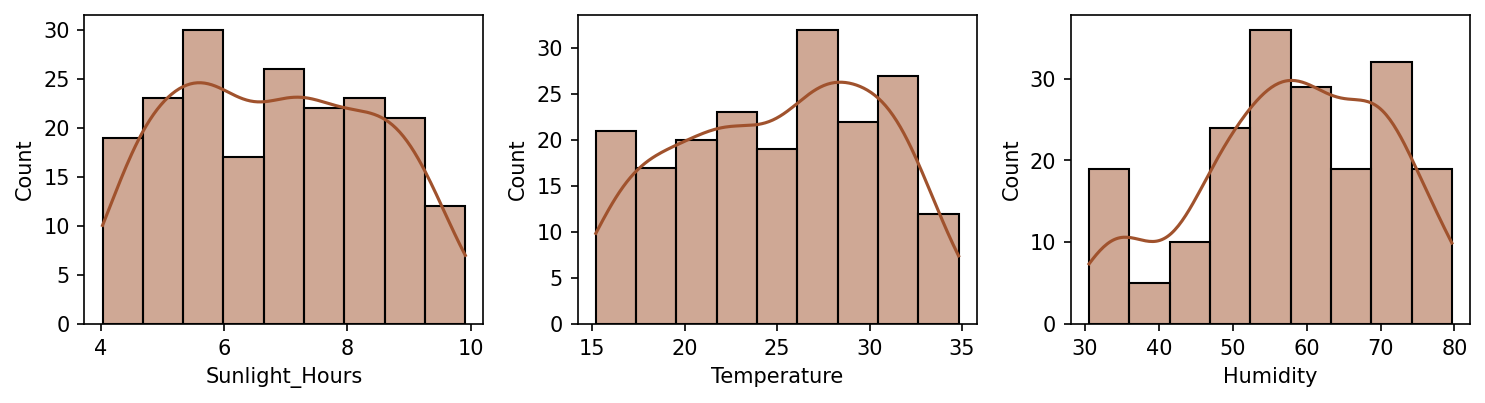

In [28]:
# Plotting histograms for numerical values
outlier_columns = plant_growth[['Sunlight_Hours', 'Temperature', 'Humidity']]
num_columns = outlier_columns.select_dtypes(include=[np.number]).columns.tolist()
num_plots = len(num_columns)

plt.figure(figsize=(10, 5), dpi=150)
for i, col in enumerate(num_columns):
    plt.subplot((num_plots // 3) + 1, 3, i + 1)
    sns.histplot(plant_growth[col], kde=True, color='sienna')
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Histograms.jpg', dpi=300, transparent=True, bbox_inches='tight')

In [32]:
# Perform the Shapiro-Wilk test for normality.
# H0: The data was drawn from a normal distribution.
shapiro_columns = plant_growth[['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone', 'Water_Frequency_Num', 'Fertilizer_Type_Num']]
stat_analysis = {}
for column in shapiro_columns.columns:
    stat_analysis[column] = {
        'Shapiro': stats.shapiro(shapiro_columns[column]),
        'Kurtosis': stats.kurtosis(shapiro_columns[column]),
        'Skewness': stats.skew(shapiro_columns[column])
    }

stat_analysis_df = pd.DataFrame(stat_analysis).T
stat_analysis_df.to_html('stat_analysis.html')
stat_analysis_df
# Shapiro: 1. value: t-stat of the test, 2. value: p-value

,Shapiro,Kurtosis,Skewness
Sunlight_Hours,"(0.9621165726170912, 4.680138612795632e-05)",-1.135398,0.077723
Temperature,"(0.9606658219985548, 3.2633238997133625e-05)",-1.098712,-0.156867
Humidity,"(0.9652345715654725, 0.00010390069248064533)",-0.629519,-0.362603
Growth_Milestone,"(0.6364211238073004, 4.493626820480306e-20)",-1.999893,0.010363
Water_Frequency_Num,"(0.7850354822376922, 1.4681557594670532e-15)",-1.521585,-0.145276
Fertilizer_Type_Num,"(0.7765618991763192, 7.177078678385363e-16)",-1.601761,0.088619


In [33]:
# Another method for listing columns distributed non_normally.
# p-value < 0.05 indicates non-normal distribution
non_normal_cols = []
for column in shapiro_columns.columns:
    stat, p = stats.shapiro(shapiro_columns[column])
    if p < 0.05:  
        non_normal_cols.append(column)

print("Non-normally distributed columns:", non_normal_cols)

Non-normally distributed columns: ['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone', 'Water_Frequency_Num', 'Fertilizer_Type_Num']


### Testing correlations

In [35]:
# Grouping the dataset according to the different soil types.
loam = plant_growth.loc[plant_growth['Soil_Type'] == 'loam']
sandy = plant_growth.loc[plant_growth['Soil_Type'] == 'sandy']
clay = plant_growth.loc[plant_growth['Soil_Type'] == 'clay']

In [36]:
loam

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone,Water_Frequency_Num,Fertilizer_Type_Num
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0,2,3
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0,2,1
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0,2,1
6,loam,4.444268,daily,organic,25.984533,69.578952,1,3,2
8,loam,4.695214,bi-weekly,none,28.203948,34.560305,1,2,1
...,...,...,...,...,...,...,...,...,...
178,loam,8.012000,bi-weekly,none,20.900000,55.800000,0,2,1
181,loam,7.289000,bi-weekly,chemical,28.600000,60.900000,1,2,3
184,loam,5.922000,bi-weekly,none,26.800000,70.600000,0,2,1
187,loam,6.127000,bi-weekly,organic,22.100000,55.700000,1,2,2


In [37]:
sandy

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone,Water_Frequency_Num,Fertilizer_Type_Num
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1,1,2
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0,2,2
5,sandy,8.627622,bi-weekly,none,20.004858,67.618726,0,2,1
12,sandy,4.381350,daily,organic,26.087081,52.076525,1,3,2
15,sandy,8.377637,bi-weekly,chemical,19.954620,35.853351,1,2,3
...,...,...,...,...,...,...,...,...,...
179,sandy,5.233000,daily,organic,31.800000,47.900000,1,3,2
182,sandy,4.671000,daily,none,18.400000,61.500000,0,3,1
185,sandy,7.321000,daily,chemical,20.300000,47.300000,1,3,3
188,sandy,5.652000,daily,none,28.000000,70.200000,0,3,1


In [38]:
clay

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone,Water_Frequency_Num,Fertilizer_Type_Num
7,clay,6.150794,daily,organic,29.291918,69.480907,0,3,2
14,clay,5.951100,weekly,none,23.392001,47.545751,1,1,1
16,clay,7.825345,bi-weekly,chemical,22.119454,37.149584,0,2,3
17,clay,9.323276,weekly,none,30.156922,68.075532,0,1,1
18,clay,6.833290,weekly,chemical,15.287870,60.910903,1,1,3
...,...,...,...,...,...,...,...,...,...
180,clay,6.456000,weekly,none,24.900000,70.800000,0,1,1
183,clay,8.846000,weekly,organic,27.700000,56.800000,1,1,2
186,clay,9.034000,weekly,none,31.700000,61.000000,0,1,1
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1,1,3


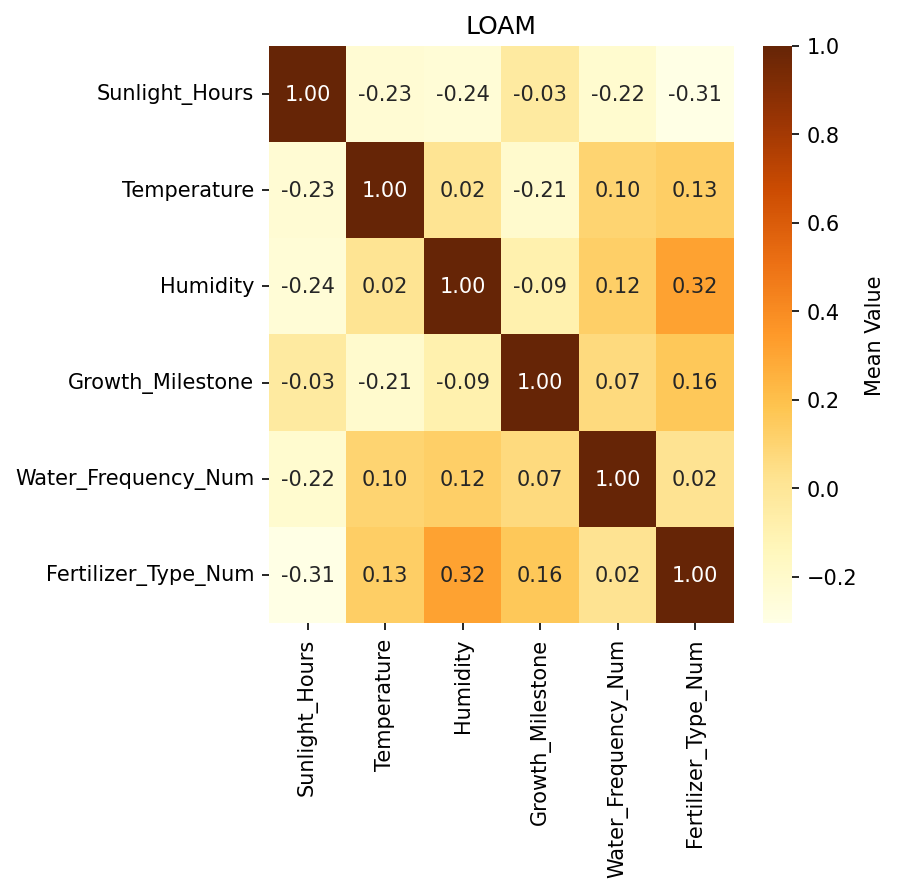

In [39]:
# Heatmap visualisation of pairwise correlations of different conditions (columns): 'loam' soil type
loam_dataset_for_heatmap=loam[['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone', 'Water_Frequency_Num', 'Fertilizer_Type_Num']]
plt.figure(figsize=(5, 5), dpi=150)
sns.heatmap(loam_dataset_for_heatmap.corr(), cbar_kws={'label': 'Mean Value'}, annot = True, cmap='YlOrBr', fmt = '.2f')
plt.title('LOAM')
plt.savefig('LOAM.jpg', dpi=300, transparent=True, bbox_inches='tight')

In [40]:
numerical_columns = loam_dataset_for_heatmap[['Sunlight_Hours', 'Temperature', 'Humidity', 'Water_Frequency_Num', 'Fertilizer_Type_Num']]
# I determined the values of point-biserial correlation between continuous attributes and the binary target variable (Growth Milestone)
correlation_results = {}
for col in numerical_columns:
    correlation, p_value = pointbiserialr(loam_dataset_for_heatmap[col], loam_dataset_for_heatmap['Growth_Milestone'])
    correlation_results[col] = (correlation, p_value)

for col, (correlation, p_value) in correlation_results.items():
    print(f'{col}: correlation = {correlation:.2f}, p-value = {p_value:.5f}')

Sunlight_Hours: correlation = -0.03, p-value = 0.79303
Temperature: correlation = -0.21, p-value = 0.10947
Humidity: correlation = -0.09, p-value = 0.49645
Water_Frequency_Num: correlation = 0.07, p-value = 0.58097
Fertilizer_Type_Num: correlation = 0.16, p-value = 0.21526


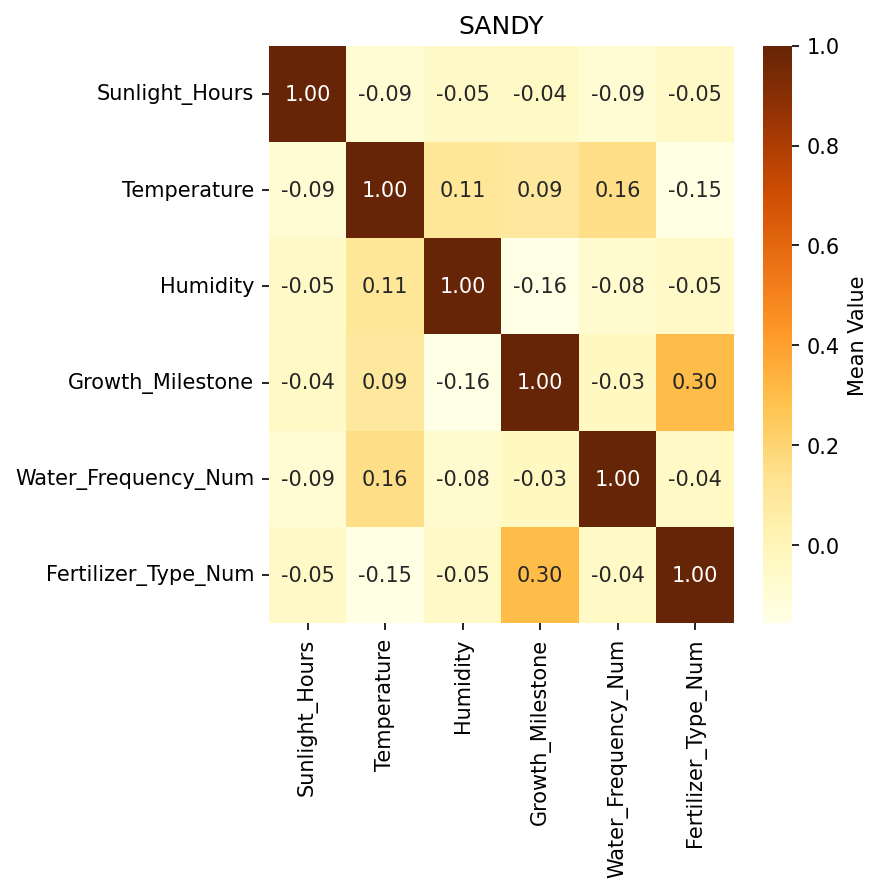

In [41]:
# Heatmap visualisation of pairwise correlations of different conditions (columns): 'sandy' soil type
sandy_dataset_for_heatmap=sandy[['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone', 'Water_Frequency_Num', 'Fertilizer_Type_Num']]
plt.figure(figsize=(5, 5), dpi=150)
sns.heatmap(sandy_dataset_for_heatmap.corr(), cbar_kws={'label': 'Mean Value'}, annot = True, cmap='YlOrBr', fmt = '.2f')
plt.title('SANDY')
plt.savefig('SANDY.jpg', dpi=300, transparent=True, bbox_inches='tight')

In [42]:
numerical_columns2 = sandy_dataset_for_heatmap[['Sunlight_Hours', 'Temperature', 'Humidity', 'Water_Frequency_Num', 'Fertilizer_Type_Num']]
# I determined the values of point-biserial correlation between continuous attributes and the binary target variable (Growth Milestone)
correlation_results = {}
for col in numerical_columns2:
    correlation, p_value = pointbiserialr(sandy_dataset_for_heatmap[col], sandy_dataset_for_heatmap['Growth_Milestone'])
    correlation_results[col] = (correlation, p_value)

for col, (correlation, p_value) in correlation_results.items():
    print(f'{col}: correlation = {correlation:.2f}, p-value = {p_value:.5f}')

Sunlight_Hours: correlation = -0.04, p-value = 0.73610
Temperature: correlation = 0.09, p-value = 0.46363
Humidity: correlation = -0.16, p-value = 0.21601
Water_Frequency_Num: correlation = -0.03, p-value = 0.83842
Fertilizer_Type_Num: correlation = 0.30, p-value = 0.01513


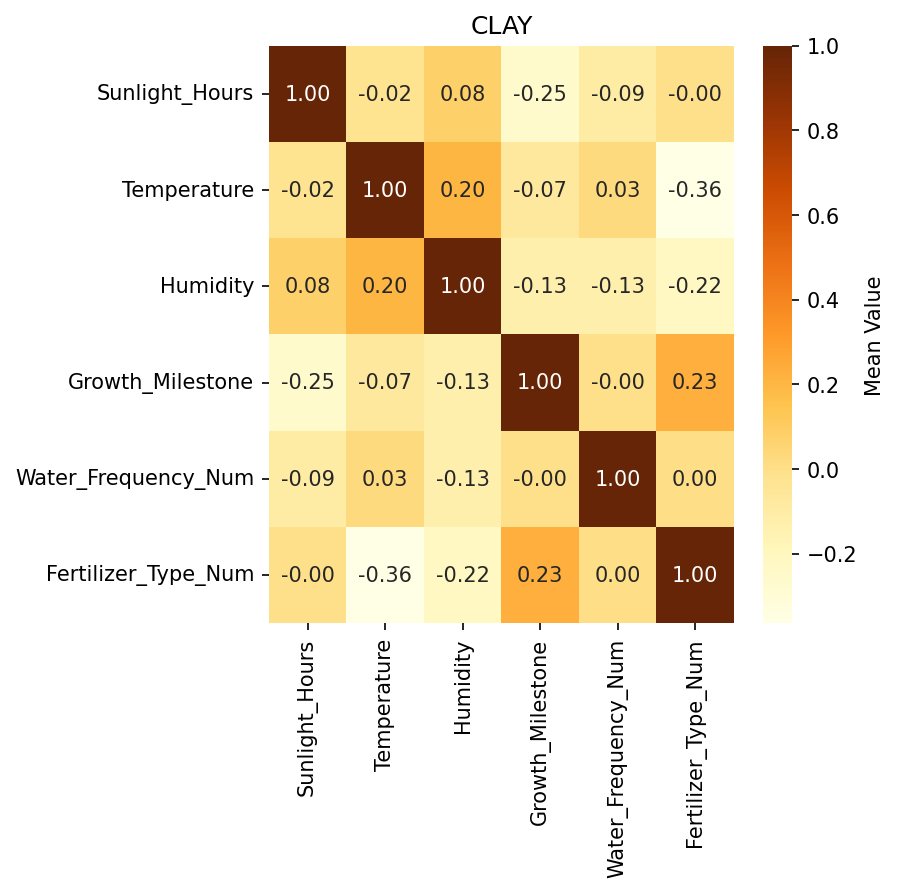

In [44]:
# Heatmap visualisation of pairwise correlations of different conditions (columns): 'clay' soil type
clay_dataset_for_heatmap=clay[['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone', 'Water_Frequency_Num', 'Fertilizer_Type_Num']]
plt.figure(figsize=(5, 5), dpi=150)
sns.heatmap(clay_dataset_for_heatmap.corr(), cbar_kws={'label': 'Mean Value'}, annot = True, cmap='YlOrBr', fmt = '.2f')
plt.title('CLAY')
plt.savefig('CLAY.jpg', dpi=300, transparent=True, bbox_inches='tight')

In [45]:
numerical_columns3 = clay_dataset_for_heatmap[['Sunlight_Hours', 'Temperature', 'Humidity', 'Water_Frequency_Num', 'Fertilizer_Type_Num']]
# I determined the values of point-biserial correlation between continuous attributes and the binary target variable (Growth Milestone)
correlation_results = {}
for col in numerical_columns3:
    correlation, p_value = pointbiserialr(clay_dataset_for_heatmap[col], clay_dataset_for_heatmap['Growth_Milestone'])
    correlation_results[col] = (correlation, p_value)

for col, (correlation, p_value) in correlation_results.items():
    print(f'{col}: correlation = {correlation:.2f}, p-value = {p_value:.5f}')

Sunlight_Hours: correlation = -0.25, p-value = 0.03793
Temperature: correlation = -0.07, p-value = 0.58516
Humidity: correlation = -0.13, p-value = 0.30975
Water_Frequency_Num: correlation = -0.00, p-value = 0.98290
Fertilizer_Type_Num: correlation = 0.23, p-value = 0.06115


In [46]:
heatmap_sum_df = plant_growth[['Soil_Type', 'Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone', 'Water_Frequency_Num', 'Fertilizer_Type_Num']]
grouped_df = heatmap_sum_df.groupby('Soil_Type').mean().reset_index()
grouped_df


,Soil_Type,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Water_Frequency_Num,Fertilizer_Type_Num
0,clay,7.274215,25.242651,59.105937,0.447761,1.835821,2.014925
1,loam,6.407332,24.895853,56.946469,0.564516,2.096774,1.887097
2,sandy,6.763820,25.076315,58.161157,0.484375,2.312500,1.953125


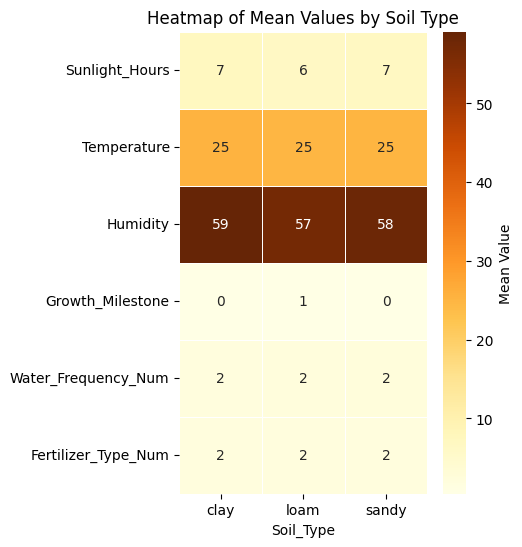

In [47]:
# Representative heatmap visulatisation to summarize the different conditions grouped by the soil types.
heatmap_data = grouped_df.set_index('Soil_Type').T

plt.figure(figsize=(4, 6), dpi=100)
sns.heatmap(heatmap_data, annot=True, cmap='YlOrBr', cbar_kws={'label': 'Mean Value'}, fmt = '.0f', linewidths=0.5, linecolor='white')
plt.title('Heatmap of Mean Values by Soil Type')

plt.savefig('SUMMARY.jpg', dpi=300, transparent=True, bbox_inches='tight')